# 📝 Exercise M6.02

The aim of this exercise it to explore some attributes available in
scikit-learn's random forest.

First, we will fit the penguins regression dataset.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

penguins = pd.read_csv("../datasets/penguins_regression.csv")
feature_name = "Flipper Length (mm)"
target_name = "Body Mass (g)"
data, target = penguins[[feature_name]], penguins[target_name]
data_train, data_test, target_train, target_test = train_test_split(
    data, target, random_state=0)

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

Create a random forest containing three trees. Train the forest and
check the generalization performance on the testing set in terms of mean
absolute error.

In [2]:
# Write your code here.
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [41]:
# random forest containing three trees
forest = RandomForestRegressor(n_estimators=3, n_jobs=4, random_state=0)

# training
forest.fit(data_train, target_train)

# check generalization on test_set by means of meae
forest_predictions = forest.predict(data_test)

mean_absolute_error(target_test, forest_predictions)

345.3494091107379

We now aim to plot the predictions from the individual trees in the forest.
For that purpose you have to create first a new dataset containing evenly
spaced values for the flipper length over the interval between 170 mm and 230
mm.

In [47]:
# Write your code here.
import numpy as np
data_new = np.linspace(170, 230, num=300).reshape(-1,1)

The trees contained in the forest that you created can be accessed with the
attribute `estimators_`. Use them to predict the body mass corresponding to
the values in this newly created dataset. Similarly find the predictions of
the random forest in this dataset.

Now make a plot that displays:
- the whole `data` using a scatter plot;
- the decision of each individual tree;
- the decision of the random forest.

/home/ageo/.local/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


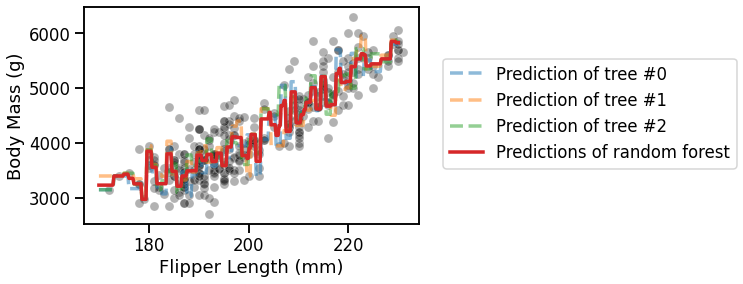

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

for tree_idx, tree in enumerate(forest.estimators_):
    label = f"Prediction of tree #{tree_idx}"
    tree_predictions = tree.predict(data_new)
    plt.plot(data_new, tree_predictions, linestyle='--', alpha=0.5,
             label=label
            )

forest_predictions = forest.predict(data_new)
plt.plot(data_new, forest_predictions,
         color='tab:red', label='Predictions of random forest'
        )
sns.scatterplot(x=data['Flipper Length (mm)'], y=target, color='black', alpha=0.3)
_ = plt.legend(bbox_to_anchor=(1.05, 0.8), loc='upper left')